### 설명: https://blog.naver.com/hyemin8670/222289876736

In [14]:
import pandas as pd
df=pd.read_csv('./data/3-1.csv',index_col=0)
df.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
4,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0


<AxesSubplot:>

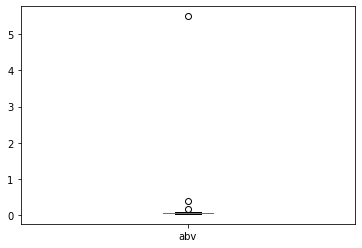

In [15]:
df.plot(kind='box',y='abv')

In [16]:
df['abv'].describe()

count    2190.000000
mean        0.060186
std         0.117010
min         0.032000
25%         0.050000
50%         0.055000
75%         0.065000
max         5.500000
Name: abv, dtype: float64

In [17]:
q1=df['abv'].quantile(0.25)#25%Q1의 값을 확인할 수 있음
q3=df['abv'].quantile(0.75)#75%Q3의 값을 확인할 수 있음

iqr=q3-q1

#이상치 확인
re=(df['abv']<q1-iqr*1.5) | (df['abv']>q3+iqr*1.5)
df[re] #re의 true인 값만 출력함

,abv,ibu,id,name,style,brewery_id,ounces
963,0.172,NaN,3691,Chamisul Fresh,Soju,993,12.17
1856,0.400,NaN,3012,Grey Goose,Vodka,893,25.26
2250,5.500,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.00


In [19]:
#2250번행에 0.055
#이상치를 확인함

df.loc[2250,'abv']=0.055
df.loc[2250]


abv                             0.055
ibu                                40
id                                145
name              Silverback Pale Ale
style         American Pale Ale (APA)
brewery_id                        424
ounces                             12
Name: 2250, dtype: object

In [20]:
re=(df['abv']<q1-iqr*1.5) | (df['abv']>q3+iqr*1.5)
df[re] #re의 true인 값만 출력함

,abv,ibu,id,name,style,brewery_id,ounces
963,0.172,NaN,3691,Chamisul Fresh,Soju,993,12.17
1856,0.400,NaN,3012,Grey Goose,Vodka,893,25.26


In [21]:
df[re].index

Int64Index([963, 1856], dtype='int64')

In [23]:
#963,1856번 인덱스번호는 삭제
#이상치 확인함

df=df.drop([963,1856])
df

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
4,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0
...,...,...,...,...,...,...,...
2247,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2248,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2249,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2250,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


<AxesSubplot:>

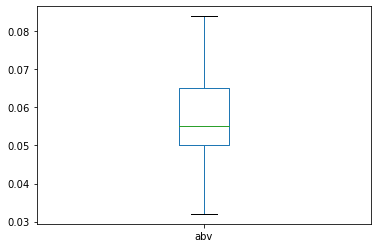

In [24]:
df.plot(kind='box',y='abv')